第９章　混合正規分布のパラメータ推定  
9.5 混合正規分布のパラメータ推定実験

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
%precision 3
import seaborn

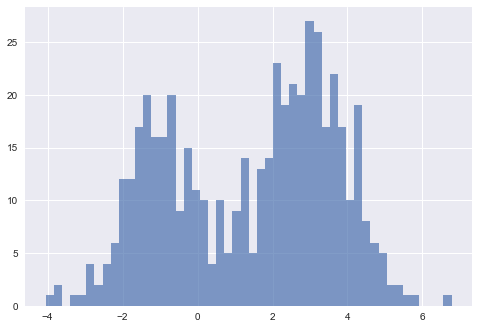

In [2]:
'''１次元の２つの混合正規分布からデータ点500個を作る'''
data = np.r_[np.random.normal(3,1,300),np.random.normal(-1,1,200)]
plt.hist(data,bins=50,alpha=0.7)
plt.show()

EMアルゴリズムで２つの分布のパラメータμ（平均）を推定する

In [3]:
'''初期値'''
init_u1 = -2
init_u2 = -3
ui = [[init_u1, init_u2]]
'''既知パラメータ'''
n = 500
pi_1 = 0.6
pi_2 = 0.4
si_1 = 1
si_2 = 1

In [4]:
def norm(x, ui, si):
    '''
    x : データ点の１つ
    ui : 分布iの平均
    si : 分布iの標準偏差
    '''
    
    return 1/(np.sqrt(2*np.pi)*si)*np.exp(-(1/2)*(x-ui)**2/si**2)

In [5]:
def E_step(ui):
    '''
    ui = [ui_1, ui_2]
    '''
    
    p_wi_xk =[]
    for k in range(n):
        joint_1 = pi_1*norm(data[k],ui[0],si_1)
        joint_2 = pi_2*norm(data[k],ui[1],si_2)
        p_wi_xk.append([joint_1/(joint_1+joint_2), joint_2/(joint_1+joint_2)])
        
    return p_wi_xk

In [6]:
def M_step(p_wi_xk):
    '''
    p_wi_xk = [w1_x1, w2_x1],[w1_x2, w2_x2], ,,, ,[w1_x500,w2_x500]
    '''
    sum_1_p_wi_xk = 0
    sum_1_p_wi_xk_xk = 0 
    sum_2_p_wi_xk = 0 
    sum_2_p_wi_xk_xk = 0 
    
    for k in range(n):
        
        sum_1_p_wi_xk_xk += p_wi_xk[k][0]*data[k]
        sum_1_p_wi_xk += p_wi_xk[k][0]
        sum_2_p_wi_xk_xk += p_wi_xk[k][1]*data[k]
        sum_2_p_wi_xk += p_wi_xk[k][1]
    
    '''ui'''
    ui_1 = sum_1_p_wi_xk_xk / sum_1_p_wi_xk
    ui_2 = sum_2_p_wi_xk_xk / sum_2_p_wi_xk
    
    ui = [ui_1, ui_2]
    return ui

In [7]:
'''初期値'''
init_u1 = -2
init_u2 = -3
list_ui = [[init_u1, init_u2]]
list_p_wi_xk = []
for i in range(20):
    list_p_wi_xk.append(E_step(list_ui[i]))
    list_ui.append(M_step(list_p_wi_xk[i]))

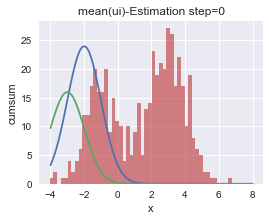

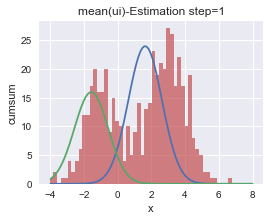

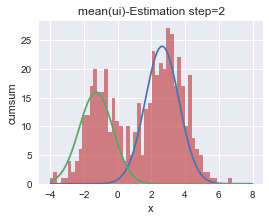

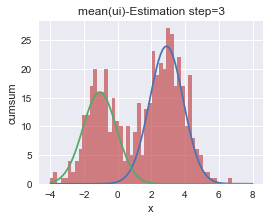

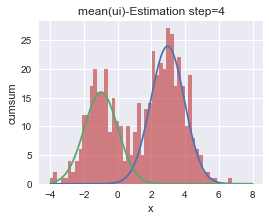

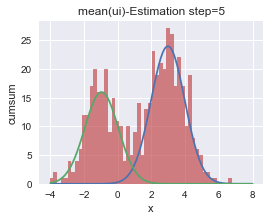

In [8]:
#混合正規分布の平均パラメータの推定の様子を描画

v_norm = np.vectorize(norm)

'''正規分布の描画'''

x = np.linspace(-4,8,100)

for i in range(0,6):
    plt.figure(figsize=(4,3))
    plt.plot(x, 100*pi_1*v_norm(x,list_ui[i][0],si_1)) #推定した正規分布の高さを合わせるために定数をかけている（かけていいのか不明）
    plt.plot(x, 100*pi_2*v_norm(x,list_ui[i][1],si_2))
    plt.title('mean(ui)-Estimation step={}'.format(i))
    plt.xlabel('x')
    plt.ylabel('cumsum')
    plt.hist(data,bins=50,alpha=0.7)
    plt.show()